<a href="https://colab.research.google.com/github/Yamito548/proyecto_final_flores/blob/main/Proyecto_fin_de_curso_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
#Instalaciones
!pip install lazypredict
!pip install LazyClassifier
!pip install scikit-learn
#Modelos
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
#Datos
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
#Procesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Visualización
import seaborn as sns
import matplotlib.pyplot as  plt
#Importar
import pickle

ERROR: Could not find a version that satisfies the requirement LazyClassifier (from versions: none)
ERROR: No matching distribution found for LazyClassifier


# Optimización, normalización y calidad del set de datos.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-fin-de-curso-diabetes/main/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


In [3]:
#Comprobar valores únicos
cont = 0
valores = ["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level","diabetes"]
for caract in valores:
  print(valores[cont].upper())
  print(data[caract].unique())
  cont+=1
  print("________________")

GENDER
['Female' 'Male' 'Other']
________________
AGE
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
________________
HYPERTENSION
[0 1]
________________
HEART_DISEASE
[1 0]
________________
SMOKING_HISTORY
['never' 'No Info' 'current' 'former' 'ever' 'not current']
________________
BMI
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
________________
HBA1C_LEVEL
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
__

In [4]:
#Los valores númericos que hay en el dataset no estan muy dispares, pero para hacer que este mejor optimizado, vamos a escalar los valores.
#Solo escalaré las necesarias
columnas_escalar = ["age","bmi","HbA1c_level","blood_glucose_level"]

#Inicializamos el escalador
escalador = StandardScaler()

#Escalamos las columnas seleccionadas
data[columnas_escalar] = escalador.fit_transform(data[columnas_escalar])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.69,0,1,never,-0.32,1.00,0.05,0
1,Female,0.54,0,0,No Info,-0.00,1.00,-1.43,0
2,Male,-0.62,0,0,never,-0.00,0.16,0.49,0
3,Female,-0.26,0,0,current,-0.58,-0.49,0.42,0
4,Male,1.52,1,1,current,-1.08,-0.68,0.42,0
...,...,...,...,...,...,...,...,...,...
99995,Female,1.69,0,0,No Info,-0.00,0.63,-1.18,0
99996,Female,-1.77,0,0,No Info,-1.50,0.91,-0.93,0
99997,Male,1.07,0,0,former,0.08,0.16,0.42,0
99998,Female,-0.79,0,0,never,1.22,-1.43,-0.93,0


In [5]:
#Codificamos la columna de gender y smoking history
codificacion = LabelEncoder()

for columna in data.columns:
  if data[columna].dtype == "object":
    data[columna] = codificacion.fit_transform(data[columna])

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.69,0,1,4,-0.32,1.00,0.05,0
1,0,0.54,0,0,0,-0.00,1.00,-1.43,0
2,1,-0.62,0,0,4,-0.00,0.16,0.49,0
3,0,-0.26,0,0,1,-0.58,-0.49,0.42,0
4,1,1.52,1,1,1,-1.08,-0.68,0.42,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.69,0,0,0,-0.00,0.63,-1.18,0
99996,0,-1.77,0,0,0,-1.50,0.91,-0.93,0
99997,1,1.07,0,0,3,0.08,0.16,0.42,0
99998,0,-0.79,0,0,4,1.22,-1.43,-0.93,0


In [6]:
#Comprobar missing values
missing_values = data.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

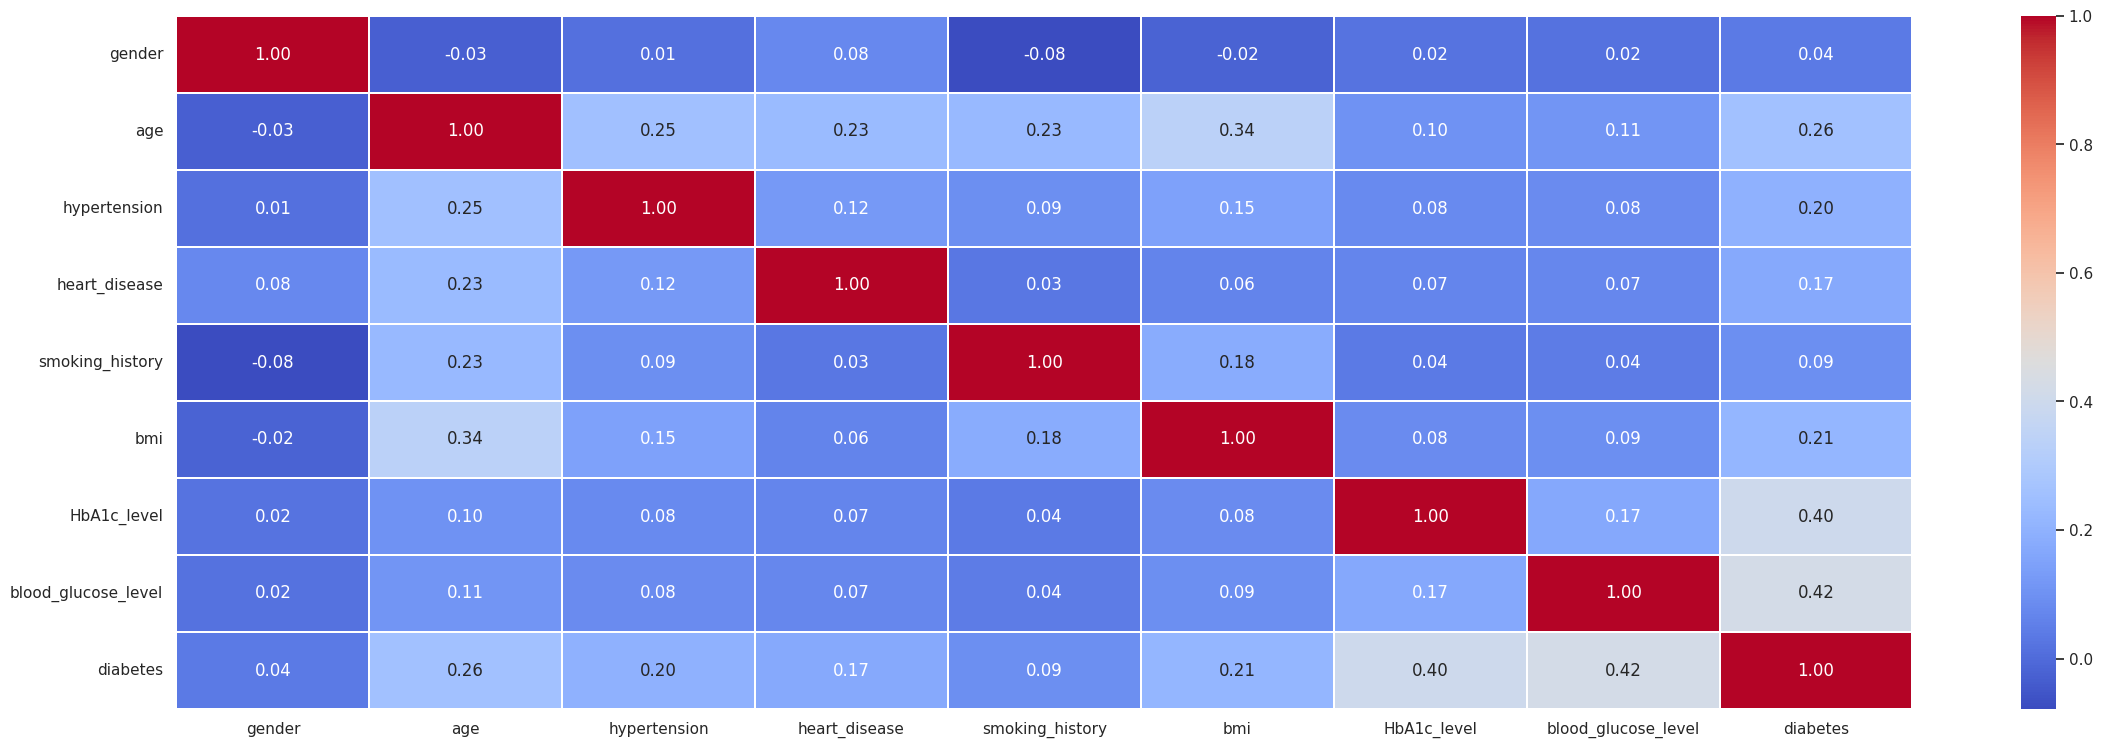

In [7]:
#Usamos una matriz de correlación para visualizar que tal se llevan las características.
matriz_correlacion = data.corr()
sns.set(style='white')
plt.figure(figsize=(28,9))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)

# Reducción del dataset

In [8]:
#Reducimos los datos, ya usaremos todos en el servidor pero por ahora es necesario reducirlos, debido a que me ha petado varias veces
def reducción(df):
  data1 = df[df["diabetes"] == 0 ].head(5000)
  data2 = df[df["diabetes"] == 1 ].head(5000)


  data = pd.concat([data1,data2],axis=0)

  return data
data = reducción(data)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.69,0,1,4,-0.32,1.00,0.05,0
1,0,0.54,0,0,0,-0.00,1.00,-1.43,0
2,1,-0.62,0,0,4,-0.00,0.16,0.49,0
3,0,-0.26,0,0,1,-0.58,-0.49,0.42,0
4,1,1.52,1,1,1,-1.08,-0.68,0.42,0
...,...,...,...,...,...,...,...,...,...
57908,1,0.76,1,0,5,-0.00,0.63,3.98,1
57909,1,0.98,0,0,4,0.67,0.16,2.50,1
57911,1,-0.84,0,0,0,0.04,1.38,0.51,1
57924,1,0.76,0,0,4,-0.52,1.84,3.49,1


# Uso de lazyclassifier

In [9]:
#Usamos lazyclassifier para ver los modelos que den mejores resultados para este dataset.
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:17<00:00,  1.68it/s]

[LightGBM] [Info] Number of positive: 2515, number of negative: 2485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503000 -> initscore=0.012000
[LightGBM] [Info] Start training from score 0.012000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.91     0.91      0.91   
AdaBoostClassifier                 0.91               0.91     0.91      0.91   
RandomForestClassifier             0.91               0.91     0.91      0.91   
XGBClassifier                      0.90     

In [10]:
data["smoking_history"].unique()

array([4, 0, 1, 3, 2, 5])

# Uso de kbest

In [11]:
#Ahora tocará ver con cuales características nos quedamos para el modelo, para ello usaremos KBEST
#Dividimos los datos
X = data.drop(["diabetes"],axis=1)
y = data["diabetes"]
modelo = LGBMClassifier(verbose=-1)
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,8+1):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test,verbose=-1)
  acc = accuracy_score(y_test, y_pred)
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El accuracy es de: {acc}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.8215

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.8945

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.895

CANTIDAD DE CARACTERÍSTICAS: 5
Las características seleccionadas para 5 son: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.9005

CANTIDAD DE CARACTERÍSTICAS: 6
Las características seleccionadas para 6 son: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')
El accuracy es de: 0.901

CANTIDAD DE CARACTERÍSTICAS: 7
Las características seleccion

In [12]:
#Hacemos una prueba con el modelo AdaBoostClassifier
#Dividimos los datos
X = data.drop(["diabetes"],axis=1)
y = data["diabetes"]
modelo = AdaBoostClassifier()
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,8+1):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El accuracy es de: {acc}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.8185

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.893

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.9005

CANTIDAD DE CARACTERÍSTICAS: 5
Las características seleccionadas para 5 son: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
El accuracy es de: 0.903

CANTIDAD DE CARACTERÍSTICAS: 6
Las características seleccionadas para 6 son: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')
El accuracy es de: 0.9055

CANTIDAD DE CARACTERÍSTICAS: 7
Las características seleccion

In [13]:
#Quitamos la columna gender
data = data.drop("gender", axis=1)

In [14]:
#Comprobamos que ya no esta gender
data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.69,0,1,4,-0.32,1.00,0.05,0
1,0.54,0,0,0,-0.00,1.00,-1.43,0
2,-0.62,0,0,4,-0.00,0.16,0.49,0
3,-0.26,0,0,1,-0.58,-0.49,0.42,0
4,1.52,1,1,1,-1.08,-0.68,0.42,0
...,...,...,...,...,...,...,...,...
57908,0.76,1,0,5,-0.00,0.63,3.98,1
57909,0.98,0,0,4,0.67,0.16,2.50,1
57911,-0.84,0,0,0,0.04,1.38,0.51,1
57924,0.76,0,0,4,-0.52,1.84,3.49,1


# Búsqueda de mejores parámetros

In [15]:
# Antes del entrenamiento, vamos a buscar los mejores hiperparámetros
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_child_samples': [5, 10, 20],  # Número mínimo de muestras por hoja
    'num_leaves': [31, 50, 100],       # Número máximo de hojas en un árbol
    'learning_rate': [0.01, 0.05, 0.1],# Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],      # Submuestra de datos para el entrenamiento de cada árbol
    'colsample_bytree': [0.8, 0.9, 1.0]# Submuestra de columnas para la construcción de cada árbol
}

In [16]:
modelo = LGBMClassifier()
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3988, number of negative: 4012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498500 -> initscore=-0.006000
[LightGBM] [Info] Start training from score -0.006000


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [None, 10, 20, 30],
                         'min_child_samples': [5, 10, 20],
                         'num_leaves': [31, 50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [17]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print(f"""
      Grid:
      Mejor conjunto de parámetros: {best_params_grid}
      Mejor score: {best_score_grid}
      """)


      Grid:
      Mejor conjunto de parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 5, 'num_leaves': 31, 'subsample': 0.8}
      Mejor score: 0.9105000000000001
      


In [18]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_grid = grid_search.best_estimator_
best_model_grid.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3988, number of negative: 4012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498500 -> initscore=-0.006000
[LightGBM] [Info] Start training from score -0.006000


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=10,
               min_child_samples=5, subsample=0.8)

In [19]:
#Entenamos el modelo con los mejores parámetros
modelo = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=10,min_child_samples=5, subsample=0.8, verbose=-1)
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"La accuracy para el modelo LGBMClassifier es de {acc}")

La accuracy para el modelo LGBMClassifier es de 0.9105


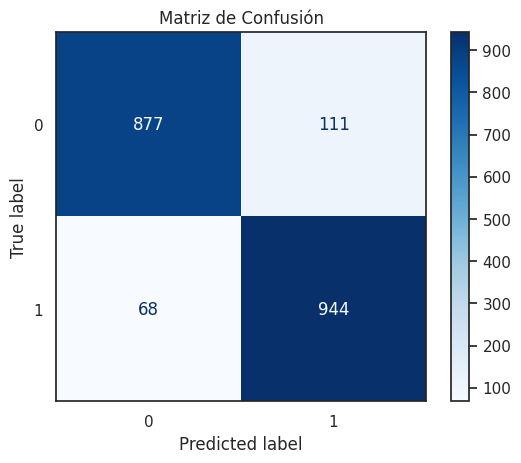

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Exportar el modelo

In [21]:
#Importamos el modelo para usarlo en la API

#Guardamos el modelo
with open('modelo_diabetes.pkl', 'wb') as archivo:
  pickle.dump(modelo, archivo)